In [1]:
from google.colab import files
uploaded = files.upload()


Saving personal_finance_sample_dataset.csv to personal_finance_sample_dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv('personal_finance_sample_dataset.csv')
print("Shape:", df.shape)  # Shows rows x columns
df.head()  # First 5 rows


Shape: (570, 5)


,Date,Category,Amount,Payment Method,Notes
0,2024-01-01,Entertainment,29.10,Bank Transfer,Coffee
1,2024-01-02,Entertainment,15.33,Bank Transfer,Dinner
2,2024-01-02,Food,31.74,Debit Card,Coffee
3,2024-01-02,Entertainment,32.97,Credit Card,Snacks
4,2024-01-04,Transport,30.19,Credit Card,Subscription


In [3]:
print("Missing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print("\nUnique categories:", df['Category'].unique())
print("\nAmount stats:\n", df['Amount'].describe())


Missing values:
 Date               0
Category          17
Amount            17
Payment Method    17
Notes             40
dtype: int64

Duplicate rows: 18

Unique categories: ['Entertainment' 'Food' 'Transport' nan]

Amount stats:
 count    553.000000
mean      38.001844
std       22.776444
min        0.610000
25%       21.460000
50%       33.570000
75%       48.940000
max      128.860000
Name: Amount, dtype: float64


In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
print("After type fix - missing:\n", df.isnull().sum())


After type fix - missing:
 Date               0
Category          17
Amount            17
Payment Method    17
Notes             40
dtype: int64


In [5]:
df['Category'] = df['Category'].fillna('Other')
print("Categories now:", df['Category'].value_counts())


Categories now: Category
Transport        196
Entertainment    188
Food             169
Other             17
Name: count, dtype: int64


In [6]:
df = df.dropna(subset=['Amount'])
print("Rows after dropping bad amounts:", len(df))


Rows after dropping bad amounts: 553


In [7]:
df = df.drop_duplicates()
print("Final clean shape:", df.shape)


Final clean shape: (535, 5)


In [8]:
category_spend = df.groupby('Category')['Amount'].sum().round(2)
print("Spending by Category:\n", category_spend)


Spending by Category:
 Category
Entertainment    7181.87
Food             5454.45
Other             705.21
Transport        7009.36
Name: Amount, dtype: float64


In [9]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_spend = df.groupby('Month')['Amount'].sum().round(2)
print("Monthly totals:\n", monthly_spend)


Monthly totals:
 Month
2024-01    1241.16
2024-02    1767.69
2024-03    1520.52
2024-04    1460.92
2024-05    2001.28
2024-06     892.78
2024-07    1499.25
2024-08    1341.72
2024-09    1225.80
2024-10    2044.89
2024-11    1279.62
2024-12    1719.73
2025-01    1256.56
2025-02    1098.97
Freq: M, Name: Amount, dtype: float64


In [10]:
payment_spend = df.groupby('Payment Method')['Amount'].sum().round(2)
print("Payment breakdown:\n", payment_spend)


Payment breakdown:
 Payment Method
Bank Transfer    4101.19
Cash             4474.68
Credit Card      3396.02
Debit Card       4090.09
UPI              4288.91
Name: Amount, dtype: float64


In [11]:
df.to_csv('clean_finance_data.csv', index=False)
print("✅ Clean data saved as 'clean_finance_data.csv'")


✅ Clean data saved as 'clean_finance_data.csv'


In [12]:
!pip install plotly matplotlib seaborn streamlit -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.0 MB/s eta 0:00:00


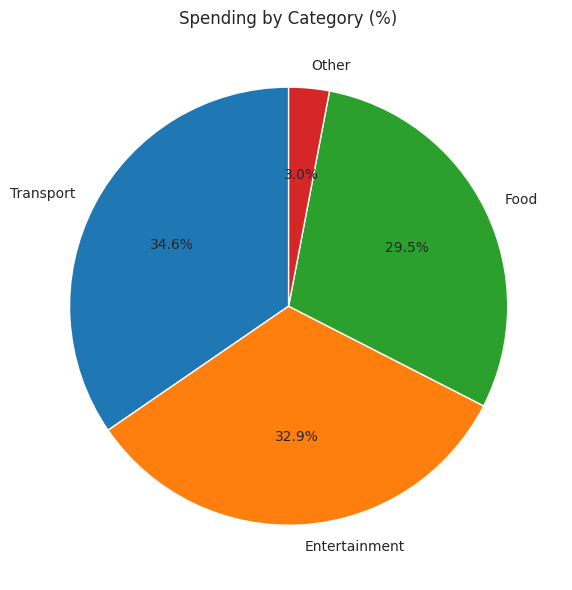

📊 Saved as 'category_pie.png'


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Top categories pie
top_cats = df['Category'].value_counts().head(6)
plt.figure(figsize=(8,6))
plt.pie(top_cats.values, labels=top_cats.index, autopct='%1.1f%%', startangle=90)
plt.title('Spending by Category (%)')
plt.tight_layout()
plt.savefig('category_pie.png', dpi=300, bbox_inches='tight')
plt.show()
print("📊 Saved as 'category_pie.png'")


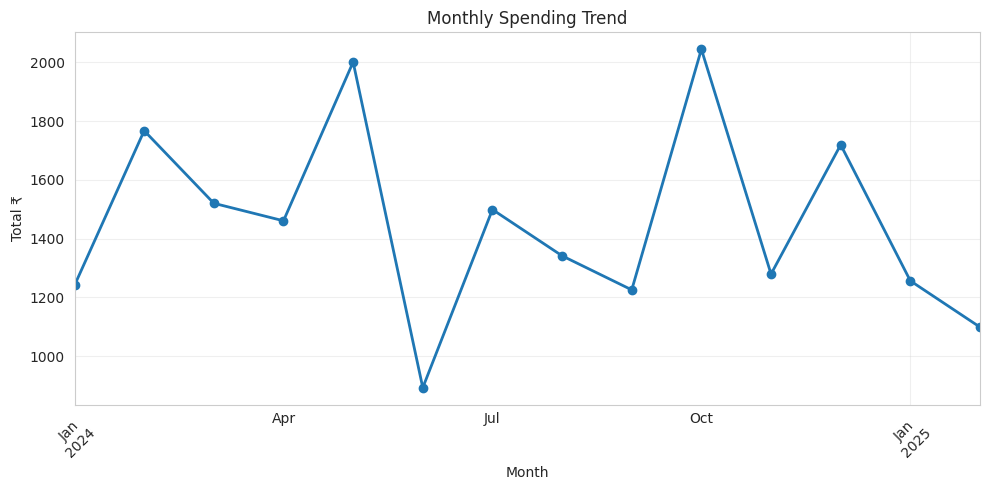

In [14]:
# Monthly line plot
monthly_spend = df.groupby('Month')['Amount'].sum()
plt.figure(figsize=(10,5))
monthly_spend.plot(kind='line', marker='o', linewidth=2)
plt.title('Monthly Spending Trend')
plt.ylabel('Total ₹')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_trend.png', dpi=300, bbox_inches='tight')
plt.show()


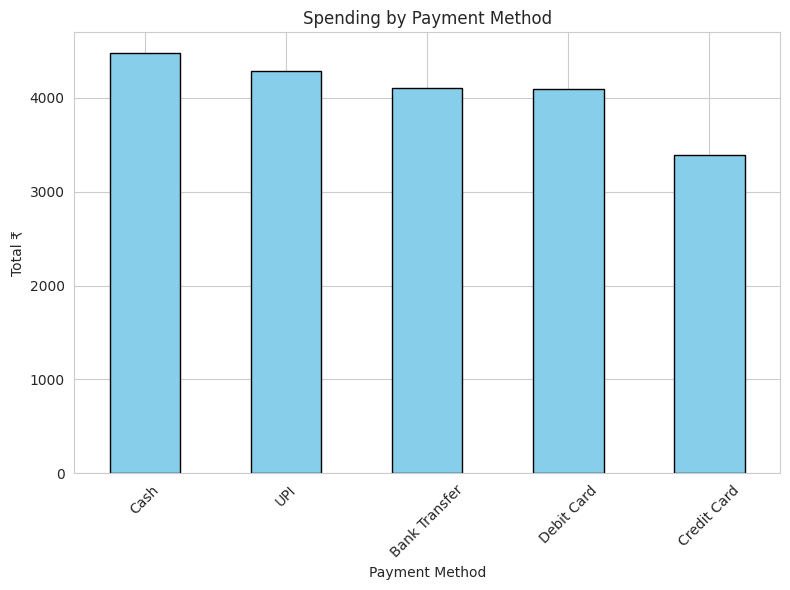

In [15]:
# Payment bars
payment_spend = df.groupby('Payment Method')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
payment_spend.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Spending by Payment Method')
plt.ylabel('Total ₹')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('payment_bar.png', dpi=300, bbox_inches='tight')
plt.show()


In [16]:
import plotly.express as px
fig = px.pie(df, names='Category', title='Interactive Category Spending')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
fig.write_html('interactive_pie.html')  # Downloadable HTML
print("🌐 Interactive chart saved!")


🌐 Interactive chart saved!
